$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
# 1-D, 3-Site Hubbard Model

The Hubbard Hamiltonian for a 1-D chain of sites is:

\begin{equation} H = -t\sum_{<ij>,\sigma}(\hat{c}_{i_\sigma}\hat{c}_{j_\sigma} + \hat{c}_{j_\sigma}^\dagger\hat{c}_{i_\sigma} ) + U\sum_i\hat{c}_{i_\uparrow}^{\dagger}\hat{c}_{i_\uparrow}\hat{c}_{i_\downarrow}^{\dagger}\hat{c}_{i_\downarrow}
\end{equation}
and under the Jordan-Wigner mapping, this Hamiltonian becomes:

\begin{equation}
H = -\frac{t}{2}\sum_{<ij>}Z_{i+1:j-1}(X_{i}X_{j} + Y_{i}Y_{j}) + \frac{U}{4}\sum_{ij}(I-Z_{i})(I-Z_{j})
\end{equation}
where $Z_{i}$, $X_{i}$, and $Y_{i}$ are the corresponding Pauli matrices acting on the $i^{th}$ fermionic mode and for a chain with only 3-sites, there are no Pauli $Z$ strings in the hopping term of the Hamiltonian for a one-dimensional chain.

## 3-Site Hamiltonian and Qubit Mapping

Writing out the sum over the three sites, the Hamiltonian becomes:

\begin{align}
     H = &-\frac{t}{2}(X_0X_1 + Y_0Y_1) - \frac{t}{2}(X_1X_2 + Y_1Y_2) \nonumber \\ 
&-\frac{t}{2}(X_3X_4 + Y_3Y_4) - \frac{t}{2}(X_4X_5 + Y_4Y_5) \nonumber\\
&+ \frac{U}{4}(I-Z_0)(I-Z_3)+ \frac{U}{4}(I-Z_1)(I-Z_4) + \frac{U}{4}(I-Z_2)(I-Z_5) \nonumber\\
= &H_{01} + H_{12} + H_{23} + H_{34} + H_{03} + H_{14} + H_{25}
\end{align}

### Qubit Mapping

Each site in the 3-site chain is represented by two qubits, one for each spin, and the wavefunction is represented as

$$ \ket{\psi} = \ket{q_0}\ket{q_1}\ket{q_2}\ket{q_3}\ket{q_4}\ket{q_5} $$

where $\ket{q_i} = \{ \ket{0}, \ket{1} \} $ represent unoccupied or occupied sites, $i=0,1,2$ are the spin up electron occupations and $i=3,4,5$ are the spin down electron occupations.


## Time Evolution

We want to simulate the time evolution of $\ket{\psi}$ via 

$$ \ket{\psi(t+\Delta t)} = e^{-iH\Delta t}\ket{\psi(t)} $$


We can do this via the Suzuki-Trotter formula which states that, to first order in $\Delta t$

$$e^{iH\Delta t} \approx e^{iH_{10}^{\uparrow}\Delta t}e^{iH_{12}^{\uparrow}\Delta t}e^{iH_{10}^{\downarrow}\Delta t}e^{iH_{12}^{\downarrow}\Delta t}e^{iH_0\Delta t}e^{iH_1\Delta t}e^{iH_2\Delta t} $$.


So what do the gates look like for each of these terms?

#### Hopping Terms

For each pair of hopping terms we have
\begin{equation}e^{-i\Delta t(\frac{-t}{2})(X_iX_j + Y_iY_j)} \approx e^{\frac{it\Delta t}{2}X_iX_j} e^{\frac{it\Delta t}{2}Y_iY_j}.
\label{eq:op-expansion}
\end{equation}

Expanding the first term on the right hand side

\begin{align}
e^{\frac{it\Delta t}{2}X_iX_j} = & \sum_{k=0}^{\infty} \frac{1}{k!}\left(\frac{it\Delta t}{2}X_iX_j\right)^k \nonumber \\
 =& \sum_{k, even}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)^k I + \sum_{k, odd}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)X_i X_j \nonumber \\ 
 = &\cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left( \frac{t\Delta t}{2}\right)X_i X_j \nonumber \\
 = &\begin{pmatrix}\cos\theta & 0 & 0 & i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix},
\end{align}
with $\theta=\frac{t\Delta t}{2}$, and written in the $\ket{q_{i}q_{j}}$ basis.

Similarly for the $Y_i Y_j$ terms

\begin{align}
    e^{i\frac{t\Delta t}{2}Y_i Y_j} =& \cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left(\frac{t\Delta t}{2}\right)Y_i Y_j \nonumber \\
= & \begin{pmatrix}\cos\theta & 0 & 0 & -i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ -i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix}.
\end{align}


Note also that these matrices are diagonal save for the 4x4 block corresponding to a gate acting on qubits $i$ and $j$.

### On-Site Terms


Now we'll expand the on-site term, $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$.  First we examine the powers of $(I-Z_i)(I-Z_j)$:

\begin{align} (I-Z_i)^2(I-Z_j)^2 &= (I + I - 2Z_i)(I+I-2Z_j) = 4(I-Z_i)(I-Z_j) \\
(I-Z_i)^3(I-Z_j)^3& = (I-Z_i)(I-Z_j)(I-Z_i)^2(I-Z_j)^2 \nonumber \\
&= 4(I-Z_i)^2(I-Z_j)^2 = 16(I-Z_i)(I-Z_j)\\
(I-Z_i)^4(I-Z_j)^4& = 16(I-Z_i)^2(I-Z_j)^2 = 4^3(I-Z_i)(I-Z_j)\\
\implies (I-Z_i)^k(I-Z_j)^k& = 4^{k-1}(I-Z_i)(I-Z_j), \end{align}

then writing out the expansion of $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$ we get

\begin{align} e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)} &= \sum_k \frac{1}{k!}\left(\frac{i\Delta tU}{4}\right)^k(I-Z_i)^k(I-Z_j)^k \\
&= I+(I-Z_i)(I-Z_j)\sum_k \frac{\left(i\Delta tU\right)^k}{k!}\frac{4^{k-1}}{4^k} - \frac{1}{4}(I-Z_i)(I-Z_j) \\
& = I-\frac{1}{4}(I-Z_i)(I-Z_j) + \frac{1}{4}e^{iU\Delta t}(I-Z_i)(I-Z_j)  \\
& \boxed{= I-(I-Z_i)(I-Z_j)\left(1-e^{iU\Delta t} \right) } \\
&= \begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1& 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{iU\Delta t} \end{pmatrix} .
\end{align}

## Measurement

The onsite terms of the Hamiltonian map to a matrix of the form

$$ (I-Z_i^\uparrow)(I-Z_i^\downarrow) = \ket{11}\bra{11}_{\uparrow\downarrow} $$,

the on-site energy for each site is the probability that the two qubits $\ket{q_j}_\uparrow$,$\ket{q_j}_\downarrow$ corresponding to site $j$ are *both* measured in the $\ket{1}$ state.

The hopping terms of the Hamiltonian require a bit more preparation.  To efficiently measure the hopping terms, first transform the hopping operator using the circuit found in Fig. 5 of the *Cade, Mineh, Montanaro, Stanisic* arXiv paper, *Strategies for solving the Fermi-Hubbard Model on Near-Term Quantum Computers.*  This diagonalizes the operator to

$$ D = \ket{01}\bra{01} - \ket{10}\bra{10} $$

which is equivalent to the probability of getting the outcome '01' minus the probability of getting '10' for any pair of qubits in the chain.  It also should be noted that the qubit pairs $(i-1, i)$ and $(i,i+1)$ cannot be measured simultaneously under this transformation and so if we have more than 2 sites, we need at least 2 circuit runs to measure *all* hopping terms.

### Tunneling w/ Different Hopping Terms

To simulate tunneling between sites, we apply the time evolution operator several times and measure the probabilities of each site.  To simulate hopping between different materials, the angle $\theta = \frac{t\Delta t}{2}$ is changed to $\theta' = \frac{t' \Delta t}{2}$ on the appropriate term in the evolution operator.


$^1$https://web.cs.ucdavis.edu/~bai/publications/varneyleebai09.pdf

In [46]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import random as rand
import scipy.linalg as la

provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import rcParams
rcParams['text.usetex'] = True

def reverse_list(s):
    temp_list = list(s)
    temp_list.reverse()
    return ''.join(temp_list)


#Useful tool for converting an integer to a binary bit string
def get_bin(x, n=0):
    """
    Get the binary representation of x.
    Parameters: x (int), n (int, number of digits)"""
    binry = format(x, 'b').zfill(n)
    sup = list( reversed( binry[0:int(len(binry)/2)] ) )
    sdn = list( reversed( binry[int(len(binry)/2):len(binry)] ) )
    
    return format(x, 'b').zfill(n)
    #return ''.join(sup)+''.join(sdn)




/home/kaelyn/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-03-25 10:02:58,498: Credentials are already in use. The existing account in the session will be replaced.


In [61]:
'''The task here is now to define a function which will either update a given circuit with a time-step
or return a single gate which contains all the necessary components of a time-step'''




#==========Needed Functions=============#
#Function to apply a full set of time evolution gates to a given circuit
def qc_evolve(qc, numsite, time, hop, U, trotter_steps):
    #Compute angles for the onsite and hopping gates
    # based on the model parameters t, U, and dt
    theta = hop*time/(2*trotter_slices) 
    phi = U*time/(trotter_slices)
    numq = 2*numsite
    y_hop = Operator([[np.cos(theta), 0, 0, -1j*np.sin(theta)],
                [0, np.cos(theta), 1j*np.sin(theta), 0],
                [0, 1j*np.sin(theta), np.cos(theta), 0],
                [-1j*np.sin(theta), 0, 0, np.cos(theta)]])
    x_hop = Operator([[np.cos(theta), 0, 0, 1j*np.sin(theta)],
                [0, np.cos(theta), 1j*np.sin(theta), 0],
                [0, 1j*np.sin(theta), np.cos(theta), 0],
                [1j*np.sin(theta), 0, 0, np.cos(theta)]])
    z_onsite = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, np.exp(1j*phi)]])
    
    #Loop over each time step needed and apply onsite and hopping gates
    for trot in range(trotter_steps):
        #Onsite Terms
        for i in range(0, numsite):
            qc.unitary(z_onsite, [i,i+numsite], label="Z_Onsite")
        
            #Add barrier to separate onsite from hopping terms    
            qc.barrier()

        #Hopping terms
        for i in range(0,numsite-1):
            #Spin-up chain
            qc.unitary(y_hop, [i,i+1], label="YHop")
            qc.unitary(x_hop, [i,i+1], label="Xhop")
            #Spin-down chain
            qc.unitary(y_hop, [i+numsite, i+1+numsite], label="Xhop")
            qc.unitary(x_hop, [i+numsite, i+1+numsite], label="Xhop")

            #Add barrier after finishing the time step
            qc.barrier()
    #Measure the circuit
    for i in range(numq):
        qc.measure(i, i)
        


#Function to run the circuit and store the counts for an evolution with
# num_steps number of time steps.
def sys_evolve(nsites, excitations, total_time, dt, hop, U, trotter_steps):
    #Check for correct data types
    if not isinstance(nsites, int):
        raise TypeError("Number of sites should be int")
    if np.isscalar(excitations):
        raise TypeError("Initial state should be list or numpy array")
    if not np.isscalar(total_time):
        raise TypeError("Evolution time should be scalar")
    if not np.isscalar(dt):
        raise TypeError("Time step should be scalar")
    if not np.isscalar(hop):
        raise TypeError("Hopping term should be scalar")
    if not np.isscalar(U):
        raise TypeError("Repulsion term should be scalar")
    if not isinstance(trotter_steps, int):
        raise TypeError("Number of trotter slices should be int")
        
    numq = 2*nsites
    num_steps = int(total_time/dt)
    print('Num Steps: ',num_steps)
    print('Total Time: ', total_time)
    data = np.zeros((2**numq, num_steps))
    
    for t_step in range(0, num_steps):
        #Create circuit with t_step number of steps
        q = QuantumRegister(numq)
        c = ClassicalRegister(numq)
        qcirc = QuantumCircuit(q,c)

        #=========USE THIS REGION TO SET YOUR INITIAL STATE==============
        #Initialize circuit by setting the occupation to 
        # a spin up and down electron in the middle site
        #qcirc.x(int(nsites/2))
        #qcirc.x(nsites+int(nsites/2))
        
        for flip in excitations:
            qcirc.x(flip)
        #if nsites==3:
            #Half-filling
            #qcirc.x(1)
        #    qcirc.x(4)
        #    qcirc.x(0)
        #    qcirc.x(2)
            #1 electron
        #    qcirc.x(1)        
        #===============================================================
    
        qcirc.barrier()
        #Append circuit with Trotter steps needed
        qc_evolve(qcirc, nsites, t_step*dt, hop, U, trotter_steps)
        
    
    #Choose provider and backend
        provider = IBMQ.get_provider()
        #backend = Aer.get_backend('statevector_simulator')
        backend = Aer.get_backend('qasm_simulator')
        #backend = provider.get_backend('ibmq_qasm_simulator')
        #backend = provider.get_backend('ibmqx4')
        #backend = provider.get_backend('ibmqx2')
        #backend = provider.get_backend('ibmq_16_melbourne')

        shots = 8192
        max_credits = 10 #Max number of credits to spend on execution
        job_exp = execute(qcirc, backend=backend, shots=shots, max_credits=max_credits)
        job_monitor(job_exp)
        result = job_exp.result()
        counts = result.get_counts(qcirc)
        print(result.get_counts(qcirc))
        print("Job: ",t_step+1, " of ", num_steps," complete.")
    
    #Store results in data array and normalize them
        for i in range(2**numq):
            if counts.get(get_bin(i,numq)) is None:
                dat = 0
            else:
                dat = counts.get(get_bin(i,numq))
            data[i,t_step] = dat/shots
    return data



### Run Time Evolution of System

In [65]:
#==========Set Parameters of the System=============#
dt = 0.5 #Delta t
T = 5.
time_steps = int(T/dt)
t = 1.0  #Hopping parameter
U = 2.  #On-Site repulsion
#time_steps = 10
nsites = 3
trotter_slices = 10
initial_state = np.array([1, 4])

#Run simulation
run_results = sys_evolve(nsites, initial_state, T, dt, t, U, trotter_slices)
#print(True if np.isscalar(initial_state) else False)

TypeError: Initial state should be list or numpy array

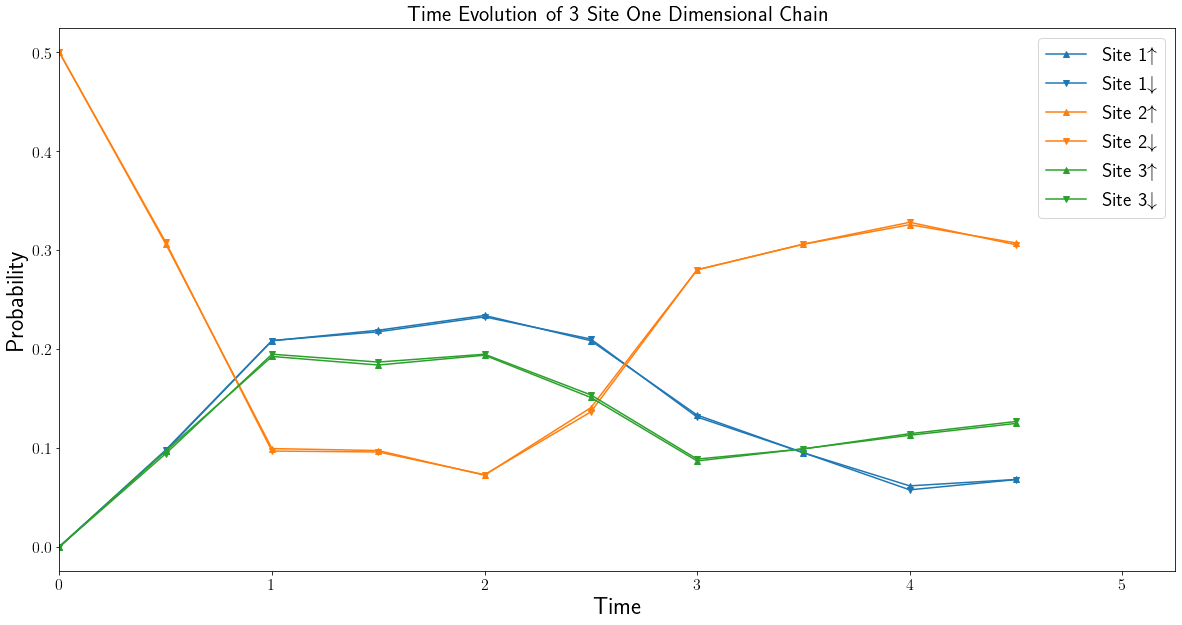

In [50]:

#Process and plot data
'''The procedure here is, for each fermionic mode, add the probability of every state containing
that mode (at a given time step), and renormalize the data based on the total occupation of each mode.
Afterwards, plot the data as a function of time step for each mode.'''
proc_data = np.zeros((2*nsite, time_steps))
timesq = np.arange(0.,time_steps*dt, dt)

#Sum over time steps
for t in range(time_steps):
    #Sum over all possible states of computer
    for i in range(2**(2*nsite)):
        #num = get_bin(i, 2*nsite)
        num = ''.join( list( reversed(get_bin(i,2*nsite)) ) )
        #For each state, check which mode(s) it contains and add them
        for mode in range(len(num)):
            if num[mode]=='1':
                proc_data[mode,t] += run_results[i,t]
    
    #Renormalize these sums so that the total occupation of the modes is 1
    norm = 0.0
    for mode in range(len(num)):
        norm += proc_data[mode,t]
    proc_data[:,t] = proc_data[:,t] / norm
    
'''
At this point, proc_data is a 2d array containing the occupation 
of each mode, for every time step
'''
    
#Create plots of the processed data
fig2, ax2 = plt.subplots(figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())

for i in range(nsite):
    #Create string label
    strup = "Site "+str(i+1)+r'$\uparrow$'
    strdwn = "Site "+str(i+1)+r'$\downarrow$'
    ax2.plot(timesq, proc_data[i,:], marker="^", color=str(colors[i]), label=strup)
    ax2.plot(timesq, proc_data[i+nsite,:], marker="v", color=str(colors[i]), label=strdwn)


#ax2.set_ylim(0, 0.55)
ax2.set_xlim(0, time_steps*dt+dt/2.)
#ax2.set_xticks(np.arange(0,time_steps*dt+dt, 0.2))
#ax2.set_yticks(np.arange(0,0.55, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)


Time Steps:  10  Step Size:  0.5


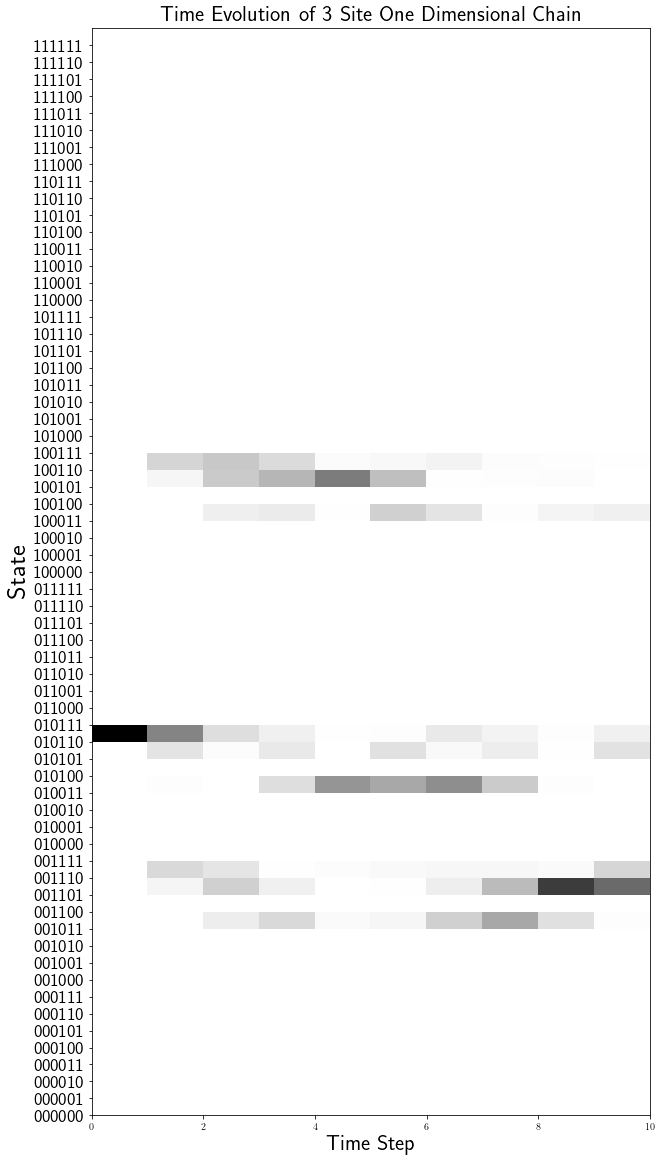

In [19]:
#Plot the raw data as a colormap
xticks = np.arange(2**(nsite*2))
xlabels=[]
print("Time Steps: ",time_steps, " Step Size: ",dt)
for i in range(2**(nsite*2)):
    xlabels.append(get_bin(i,6))
    
fig, ax = plt.subplots(figsize=(10,20))
c = ax.pcolor(run_results, cmap='binary')
ax.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
plt.yticks(xticks, xlabels, size=18)
ax.set_xlabel('Time Step', fontsize=22)
ax.set_ylabel('State', fontsize=26)
plt.show()

Below is the circuit diagram of the initalization to the state $\ket{\psi_0}=\ket{010}_\uparrow\ket{010}_\downarrow$ an a single time step.  As the system is evolved, all gates past the first barrier are repeated.
![title](img/circuit-diagram.png)

## Exact Diagonalization

The most straightforward way to find the ground state energy of a Fermi-Hubbard system is by diagonalizing its Hamiltonian.  For even modest system sizes in more than one-dimension this becomes very difficult because the Hamiltonian matrix is too large either to store in memory or diagonalize.  However, for one-dimensional chains and small system sizes, this is fairly trivial.

We can also further simplify the matrix to be diagonalized by selecting the occupation and spin sector we wish to examine because, unless the Hamiltonian includes either a spin-orbit term or an electron bath, there are no far off-diagonal terms and thus the matrix to be simplified can be reduced.

The code below will create a Hamiltonian matrix of a single electron in the three site chain.  We will then compute eigenvalues as well as the time evolution operator to compare with our results above.

In [24]:
#Try by constructing the matrix and finding the eigenvalues
N = 3
Nup = 2
Ndwn = N - Nup

t = 1.0
U = 2.

#Check if two states are different by a single hop
def hop(psii, psij):
    #Check spin down
    hopp = 0
    if psii[0]==psij[0]:
        #Create array of indices with nonzero values
        indi = np.nonzero(psii[1])[0]
        indj = np.nonzero(psij[1])[0]
        for i in range(len(indi)):
            if abs(indi[i]-indj[i])==1:
                hopp = -t
                return hopp
    #Check spin up
    if psii[1]==psij[1]:
        indi = np.nonzero(psii[0])[0]
        indj = np.nonzero(psij[0])[0]
        for i in range(len(indi)):
            if abs(indi[i]-indj[i])==1:
                hopp = -t
                return hopp
    return hopp
            

#On-site terms
def repel(l,state):
    if state[0][l]==1 and state[1][l]==1:
        return state
    else:
        return []
        
#States for 3 electrons with net spin up
#'''
states = [ [[1,1,0],[1,0,0]], [[1,1,0],[0,1,0]], [[1,1,0], [0,0,1]],
           [[1,0,1],[1,0,0]], [[1,0,1],[0,1,0]], [[1,0,1], [0,0,1]],
           [[0,1,1],[1,0,0]], [[0,1,1],[0,1,0]], [[0,1,1], [0,0,1]] ]

#States for 2 electrons in singlet state
'''
states = [ [[1,0,0],[1,0,0]], [[1,0,0],[0,1,0]], [[1,0,0],[0,0,1]],
           [[0,1,0],[1,0,0]], [[0,1,0],[0,1,0]], [[0,1,0],[0,0,1]],
           [[0,0,1],[1,0,0]], [[0,0,1],[0,1,0]], [[0,0,1],[0,0,1]] ]
#'''
#States for a single electron
#states = [ [[1,0,0],[0,0,0]], [[0,1,0],[0,0,0]], [[0,0,1],[0,0,0]] ]
#'''
H = np.zeros((len(states),len(states)) )
#Construct Hamiltonian matrix
for i in range(len(states)):
    psi_i = states[i]
    for j in range(len(states)):
        psi_j = states[j]
        
        if j==i:
            for l in range(0,N):
                if psi_i == repel(l,psi_j):
                    H[i,j] = U
                    break
        else:
            H[i,j] = hop(psi_i, psi_j)

print(H)
results = la.eig(H)
print()
for i in range(len(results[0])):
    print('Eigenvalue: ',results[0][i])
    print('Eigenvector: \n',results[1][i])
    print()

dens_ops = []
eigs = []
for vec in results[1]:
    dens_ops.append(np.outer(results[1][i],results[1][i]))
    eigs.append(results[0][i])
    print(dens_ops)
    

[[ 2. -1.  0. -1.  0.  0. -1.  0.  0.]
 [-1.  2. -1.  0. -1.  0.  0. -1.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0. -1.]
 [-1.  0.  0.  2. -1.  0. -1.  0.  0.]
 [ 0. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.  2.  0.  0. -1.]
 [-1.  0.  0. -1.  0.  0.  0. -1.  0.]
 [ 0. -1.  0.  0. -1.  0. -1.  2. -1.]
 [ 0.  0. -1.  0.  0. -1.  0. -1.  2.]]

Eigenvalue:  (-2.2782897464704304+0j)
Eigenvector: 
 [ 0.224083    0.3960736  -0.34790753  0.25826899 -0.17663211 -0.25035082
  0.54472105  0.46232813 -0.02876171]

Eigenvalue:  (4.112910634551264+0j)
Eigenvector: 
 [ 0.33851254 -0.54093955  0.2946437  -0.08213251  0.04898247 -0.20621166
  0.03614156  0.39763728 -0.5430367 ]

Eigenvalue:  (3.8522395953570956+0j)
Eigenvector: 
 [ 0.36079026  0.20594378 -0.1039536  -0.5907249  -0.46721971  0.2000854
 -0.36091095  0.26191045  0.10233801]

Eigenvalue:  (-1.0477993019826861+0j)
Eigenvector: 
 [ 0.25938921 -0.08998479  0.453718    0.27855964  0.02687537  0.59562325
  0.21421098  0.24400863  0.42

### Time Evolution

Next we will create the time evolution operator explicitly via matrix exponentiation and apply it to an initial state of a single $\uparrow$ electron in the middle site.  Then plot its time evolution, we do this by applying each step as

\begin{equation}
    \ket{\Psi(t+\Delta t)} = e^{-iH\Delta t}\ket{\Psi(t)}
\end{equation}

In [42]:
dt = 0.1
tsteps = 50
times = np.arange(0., tsteps*dt, dt)

t_op = la.expm(-1j*H*dt)
#print(np.subtract(np.identity(len(H)), dt*H*1j))
#print(t_op)
wfk = [0., 0., 0., 0., 1., 0., 0., 0., 0.] #Half-filling initial state
#wfk = [0., 0., 0., 0., 1.0, 0., 0., 0., 0.] #2 electron initial state
#wfk = [0., 1., 0.] #1 electron initial state


evolve = np.zeros([tsteps, len(wfk)])
mode_evolve = np.zeros([tsteps, 6])
evolve[0] = wfk

#Figure out how to generalize this later
'''
mode_evolve[0][0] = (evolve[0][0]+evolve[0][1]+evolve[0][2]) /2.
mode_evolve[0][1] = (evolve[0][3]+evolve[0][4]+evolve[0][5]) /2.
mode_evolve[0][2] = (evolve[0][6]+evolve[0][7]+evolve[0][8]) /2.
mode_evolve[0][3] = (evolve[0][0]+evolve[0][3]+evolve[0][6]) /2.
mode_evolve[0][4] = (evolve[0][1]+evolve[0][4]+evolve[0][7]) /2.
mode_evolve[0][5] = (evolve[0][2]+evolve[0][5]+evolve[0][8])  /2.
'''
mode_evolve[0][0] = (evolve[0][0]+evolve[0][1]+evolve[0][2]+evolve[0][3]+evolve[0][4]+evolve[0][5]) /3.
mode_evolve[0][1] = (evolve[0][0]+evolve[0][1]+evolve[0][2]+evolve[0][6]+evolve[0][7]+evolve[0][8]) /3.
mode_evolve[0][2] = (evolve[0][3]+evolve[0][4]+evolve[0][5]+evolve[0][6]+evolve[0][7]+evolve[0][8]) /3.
mode_evolve[0][3] = (evolve[0][0]+evolve[0][3]+evolve[0][6]) /3.
mode_evolve[0][4] = (evolve[0][1]+evolve[0][4]+evolve[0][7]) /3.
mode_evolve[0][5] = (evolve[0][2]+evolve[0][5]+evolve[0][8]) /3.
#'''
print(mode_evolve[0])
#Define density matrices


for t in range(1, tsteps):
    #t_op = la.expm(-1j*H*t)
    wfk = np.dot(t_op, wfk)
    evolve[t] = np.multiply(np.conj(wfk), wfk)
    norm = np.sum(evolve[t])
    #print(evolve[t])
    #Store data in modes rather than basis defined in 'states' variable
    ''' #Procedure for two electrons
    mode_evolve[t][0] = (evolve[t][0]+evolve[t][1]+evolve[t][2]) / (2)
    mode_evolve[t][1] = (evolve[t][3]+evolve[t][4]+evolve[t][5]) / (2)
    mode_evolve[t][2] = (evolve[t][6]+evolve[t][7]+evolve[t][8]) / (2)
    mode_evolve[t][3] = (evolve[t][0]+evolve[t][3]+evolve[t][6]) / (2)
    mode_evolve[t][4] = (evolve[t][1]+evolve[t][4]+evolve[t][7]) / (2)
    mode_evolve[t][5] = (evolve[t][2]+evolve[t][5]+evolve[t][8]) / (2)
    ''' #Procedure for half-filling
    mode_evolve[t][0] = (evolve[t][0]+evolve[t][1]+evolve[t][2]+evolve[t][3]+evolve[t][4]+evolve[t][5]) /3.
    mode_evolve[t][1] = (evolve[t][0]+evolve[t][1]+evolve[t][2]+evolve[t][6]+evolve[t][7]+evolve[t][8]) /3.
    mode_evolve[t][2] = (evolve[t][3]+evolve[t][4]+evolve[t][5]+evolve[t][6]+evolve[t][7]+evolve[t][8]) /3.
    mode_evolve[t][3] = (evolve[t][0]+evolve[t][3]+evolve[t][6]) /3.
    mode_evolve[t][4] = (evolve[t][1]+evolve[t][4]+evolve[t][7]) /3.
    mode_evolve[t][5] = (evolve[t][2]+evolve[t][5]+evolve[t][8]) /3.
    #'''
    print(mode_evolve[t])
    #print(np.linalg.norm(evolve[t]))
    

#print(len(evolve[:,0]) )
#print(len(times))
#print(evolve[:,0])
#print(min(evolve[:,0]))


[0.33333333 0.         0.33333333 0.         0.33333333 0.        ]
[0.33002497 0.00661672 0.33002497 0.00330018 0.32673296 0.00330018]
[0.32039815 0.02587037 0.32039815 0.01281169 0.30770996 0.01281169]
[0.30533542 0.05599582 0.30533542 0.02743082 0.27847169 0.02743082]
[0.28625817 0.09415032 0.28625817 0.04551747 0.24229839 0.04551747]
[0.26502637 0.13661393 0.26502637 0.06515411 0.20302511 0.06515411]
[0.24376335 0.17913996 0.24376335 0.0844372  0.16445893 0.0844372 ]
[0.22460231 0.21746204 0.22460231 0.10174825 0.12983684 0.10174825]
[0.20937971 0.24790725 0.20937971 0.11595802 0.1014173  0.11595802]
[0.19932992 0.26800683 0.19932992 0.12653245 0.08026843 0.12653245]
[0.19485337 0.27695992 0.19485337 0.13352876 0.06627582 0.13352876]
[0.19542704 0.27581258 0.19542704 0.13749081 0.05835172 0.13749081]
[0.19969977 0.26726712 0.19969977 0.13927009 0.05479316 0.13927009]
[0.20577023 0.25512621 0.20577023 0.13980942 0.05371448 0.13980942]
[0.21159581 0.24347506 0.21159581 0.13992996 0.0

/home/kaelyn/anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


## Results

We will then compare the results from the classical numerical simulation with the quantum one

Text(0, 0.5, 'Probability')

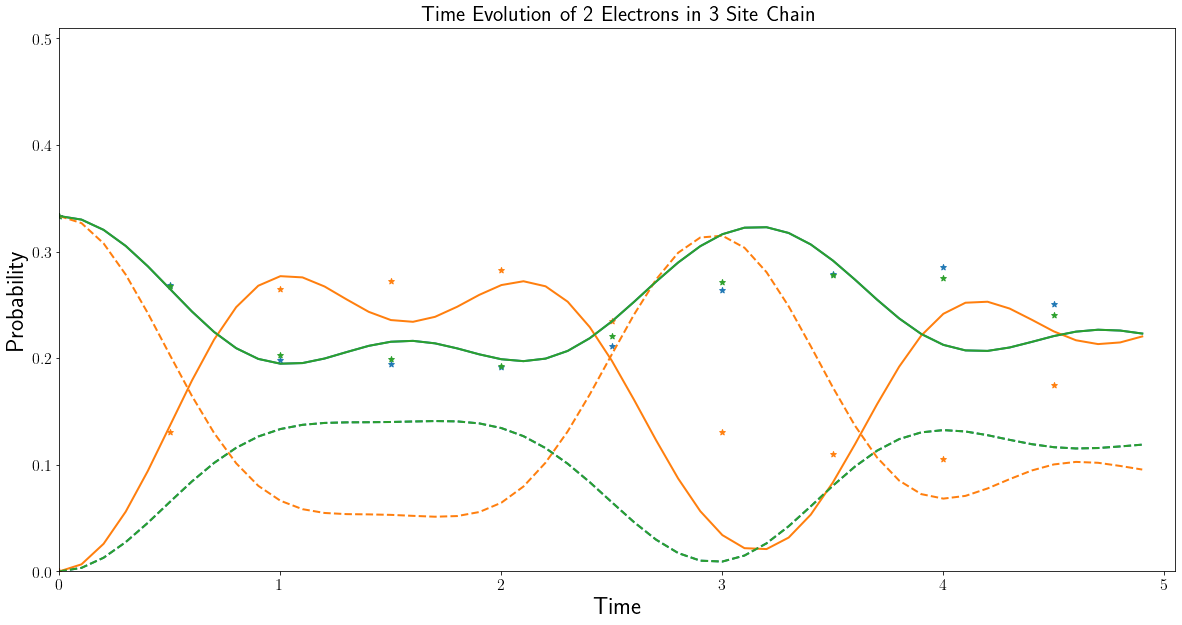

In [43]:
#Create plots of the processed data
fig2, ax2 = plt.subplots(figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())


sit1 = "Exact Site "+str(1)+r'$\uparrow$'
sit2 = "Exact Site "+str(2)+r'$\uparrow$'
sit3 = "Exact Site "+str(3)+r'$\uparrow$'
#ax2.plot(times, evolve[:,0], linestyle='--', color=colors[0], linewidth=2.5, label=sit1)
#ax2.plot(times, evolve[:,1], linestyle='--', color=str(colors[1]), linewidth=2.5, label=sit2)
#ax2.plot(times, evolve[:,2], linestyle='--', color=str(colors[2]), linewidth=2., label=sit3)
#ax2.plot(times, np.zeros(len(times)))


for i in range(nsite):
    #Create string label
    strupq = "Quantum Site "+str(i+1)+r'$\uparrow$'
    strdwnq = "Quantum Site "+str(i+1)+r'$\downarrow$'
    strup = "Numerical Site "+str(i+1)+r'$\uparrow$'
    strdwn = "Numerical Site "+str(i+1)+r'$\downarrow$'
    ax2.scatter(timesq, proc_data[i,:], marker="*", color=str(colors[i]), label=strupq)
    #ax2.scatter(timesq, proc_data[i+nsite,:], marker="v", color=str(colors[i]), label=strdwnq)
    ax2.plot(times, mode_evolve[:,i], linestyle='-', color=str(colors[i]), linewidth=2, label=strup)
    ax2.plot(times, mode_evolve[:,i+3], linestyle='--', color=str(colors[i]), linewidth=2, label=strdwn)
    #ax2.plot(times, evolve[:,i], linestyle='-', color=str(colors[i]), linewidth=2, label=strup)
    #ax2.plot(times, evolve[:,i+3], linestyle='--', color=str(colors[i]), linewidth=2, label=strdwn)




ax2.set_ylim(0, .51)
ax2.set_xlim(0, tsteps*dt+dt/2.)
#ax2.set_xticks(np.arange(0,tsteps*dt+dt, 2*dt))
#ax2.set_yticks(np.arange(0,0.5, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of 2 Electrons in 3 Site Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
#ax2.legend(fontsize=20)

## Comparing Quantum & Classical Approaches

### 1 Electron

Placing one electron into the middle site, we evolve the system in ime.  For a hopping term of $t=1$, on-site energy $U=2$ a time step of $\delta t= 0.1$ (with units of inverse energy and $\hbar=1$) and $5$ Trotter steps the following plot compares the classical numerical approach to time evolution with the quantum approach.
~![title](img/t-1-U-2.0-dt-0.1-1electron.png)

## 2 Electrons

Placing one electron into the middle site, we evolve the system in ime.  For a hopping term of $t=1$, on-site energy $U=2$ and a time step of $\delta t= 0.1$ (with units of inverse energy and $\hbar=1$) the following plot compares the classical numerical approach to time evolution with the quantum approach.
~![title](img/t-1-U-2.0-dt-0.1-2electrons.png)

Placing two electrons of opposite spin into the middle site as the input state ($\ket{\psi_0}=\ket{010}_\uparrow\ket{010}_\downarrow$), we evolve the system in time.  For a hopping term of $t=1$ and on-site energy of $U=2$ and a time step of $\delta t=0.1$ (with units of inverse energy and $\hbar=1$) the following plot demonstrates the occupation oscillating between the middle and outer sites in the chain.  As the system evolves, this oscillation decays and begins to settle into an equilibrium occupation.
~![title](img/t-1-U-2-dt-0.1-tsteps-30.png)

This decays can be seen better if we double the time the system is evolved further
![title](img/3-site-evolution-dt-0.1-tsteps-60.png)

Interesting evolutions can be seen for the 4 and 5 site chains
![title](img/4site_t-1-U-2-dt-0.1.png)
![title](img/5site_t-1-U-2-dt-0.1.png)

## Changing U

All plots below have paramaters of $\Delta t = 0.1$, $t = 1.0$, and a run for $30$ time steps.

### U=0.5
![title](img/t-1-U-0.5-dt-0.1-tsteps-30.png)

### U=1.0
![title](img/t-1-U-1.0-dt-0.1-tsteps-30.png)

### U=1.5
![title](img/t-1-U-1.5-dt-0.1-tsteps-30.png)

### U=2.0
![title](img/t-1-U-2.0-dt-0.1-tsteps-30.png)

### U=2.5
![title](img/t-1-U-2.5-dt-0.1-tsteps-30.png)